# Acoustic Feature Extraction
> From numbers to information

- toc: False 
- badges: true
- comments: true
- categories: [coswara, tutorial]
- image: images/chart-preview.png
- author: Neeraj Sharma

With the advent of well engineered sensors, the practice of data collection has gained pace. Individuals and groups have put significant efforts to record and host hours of audio recordings on the internet. Also, many of these are accessible at the click of a mouse. Is all data also information? Information is always for a purpose, and hence, the proper question will be - is *this* data informative for *so and so* task? To answer this we have to go beyond just visualizing sound signals, and understand the concept of features.

> *Example*:  How do you distinguish tomatoes from potatoes, without tasting? You will likely use characteristics such as color (red vs brown), shape (close to spherical vs somewhat spherical), tightness (soft vs hard), etc. What we listed are the features of vegetables, and values these features take can help us distinguish one vegetable from another. How? In the figure shown below we show a cartoon schematic of intensity of reflected light by a 100 potatoes and tomatoes. We can see that a majority of tomatoes reflect more light than potato and hence, this can serve as a feature to distinguish one from the other. We also see that around an intensity of 102 the distinction is not very clear. This means some of the potatoes may get confused with tomatoes, and vice versa. This implies, the selected feature cannot distinguish all kinds of potatoes from tomatoes. In general, a combination of features can give better distinctions amongst the categories.

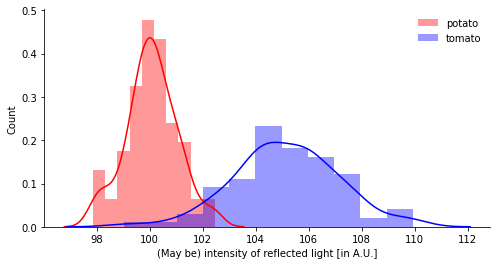

In [24]:
#collapse
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(seed=10)
x = []
x.append(np.random.randn(100)+100)
x.append(2*np.random.randn(100)+105)

# make plot
fig = plt.subplots(figsize=(8,4))
ax = plt.subplot(1,1,1)
sns.distplot(x[0],color='r',label='potato')
sns.distplot(x[1],color='b',label='tomato')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(frameon=False)
plt.xlabel('(May be) intensity of reflected light [in A.U.]')
plt.ylabel('DENSITY')
plt.show()

## Features of sound signals

What features can help distinguish one kind of sound from another? We can treat a sound signal (time-series) as an object (like we did for tomatoes and potatoes) and consider features such as average amplitude, variance in amplitude values, duration of silence, etc. A cartoon illustration is shown in the below figure. 

![](./my_images/audioFilelevel_feats_cartoon.png " An illustration of representing each audio file with a 3-D feature vector. Credit:  http://coswara.iisc.ac.in/")

To be honest, such a simple file level feature won't help in distinguishing different sound types. Can we be a little more clever? Yes, and we can ask the following questions:
* *Do we know how our ears process the sound signals?* We know a lot about this from the field of physiology. Infact, contributions towards answering this have also been awarded a Nobel Prize ([Georg von Békésy, 1961](https://acousticstoday.org/7302-2/)). It seems our hearing system housed inside the ear does a spectral analysis of the pressure variations. This spectral information is encoded in neural firings and sent to the higher auditory pathways, including the brain. Instead of writing a lot I will suggest you see this video [here](https://www.youtube.com/watch?v=LkGOGzpbrCk).
* *Do we know how our brain distinguishes a dog barking from a tiger roaring?* The answer to this is being actively studied in the field of psychoacoustic (how does mind process sound). We know from several studies that the spectral information is critical for perception. We know a lot more about speech signals. For example, we know that pitch, loudness, and timbre are critical in distinguishing one voice from another.

Based on these observations researchers have designed methods to estimate numerous features from sound signals. Two python packages we will use are [Librosa](https://pypi.org/project/librosa/) and [Parselmouth](https://parselmouth.readthedocs.io/en/stable/). A key aspect which is quite widely popular in sound signal analysis is to estimate features from short-time segments of the signal (instead of the file level features depicted in the previous figure). These short-time segments are usually 25 msec in duration ([Why?](https://iiscleap.github.io/coswara-blog/coswara/tutorial/2020/08/16/sound_visualization.html)). The below figure provides an illustration.
![](./my_images/short_time_features.png " An illustration on short-time features. Here each frame is represented with a 3-D feature vector. Credit:  http://coswara.iisc.ac.in/")

Let's write some code to extract the intensity of sound computed over short-time segments from a cough sound signal. From the plot shown below you can see that intensity is a single number, and it is high at instants of coughs.


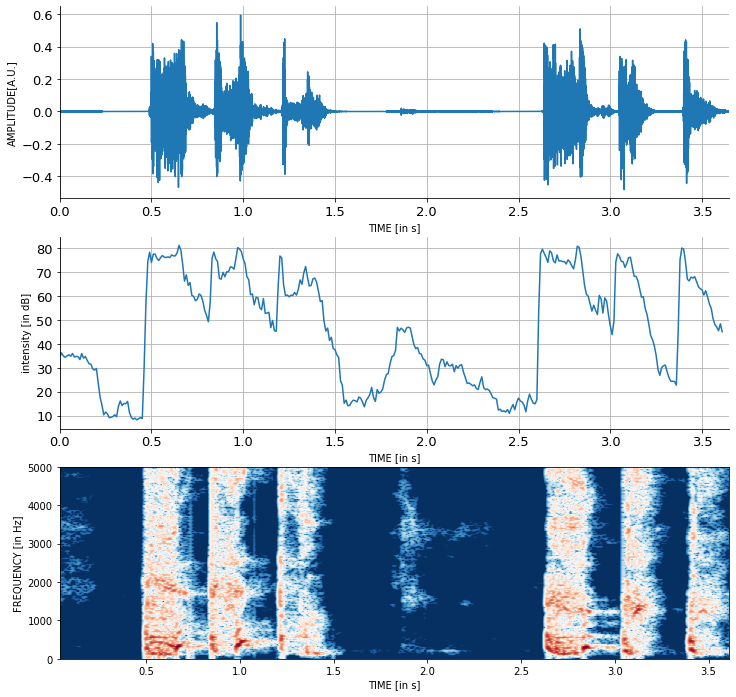

In [105]:
#collapse
import parselmouth
import librosa
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from mpl_toolkits.axes_grid1 import make_axes_locatable

sr = 16000
fname = 'nMIOAh7qRFf3pqbchclOLKbPDOm1_heavy_cough.wav'
dname = './my_data/'

# for PRAAT
hop_dur = .01
num_form = 3
max_form_freq = 5500
STANDARD_INTENSITY = 70.

# call parselmouth to load sound
snd = parselmouth.Sound(dname+fname)
snd.scale_intensity(STANDARD_INTENSITY)
x = snd.values[0]
sr = snd.sampling_frequency
times = np.arange(0,len(x),1)/sr
# estimate intensity and spectrogram
intensity = snd.to_intensity(minimum_pitch = 200.0, time_step=hop_dur,subtract_mean=False).values[0]
spectrogram = snd.to_spectrogram(window_length=0.04)

fig = plt.subplots(figsize=(12,12))
ax = plt.subplot(3,1,1)
ax.plot(times,x)
ax.set_xlabel("TIME [in s]")
ax.set_ylabel('AMPLITUDE[A.U.]')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(times[0],times[-1])
ax.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(3,1,2)
ax.plot(np.arange(0,len(intensity),1)*hop_dur,intensity)
ax.set_xlabel('TIME [in s]')
ax.set_ylabel('intensity [in dB]')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlim(times[0],times[-1])
ax.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# fig,ax = plt.subplots(1,1,figsize=(12,5))
ax = plt.subplot(3,1,3)
dynamic_range = 70
X, Y = spectrogram.x_grid(), spectrogram.y_grid()
sg_db = 10 * np.log10(spectrogram.values)
im = ax.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='RdBu_r')
plt.ylim([spectrogram.ymin, spectrogram.ymax])
plt.xlabel("TIME [in s]")
plt.ylabel("FREQUENCY [in Hz]")
plt.show()

## Acoustic Features from Coswara Database

Lets visualize some acoustic features of sound samples from the COSWARA database. We will visualize different features via grouping of sound identity and gender. In this notebook we will focus on the sustained phonation (vowel) sound samples. The existing literature in vowel phonetics will help us interpret the estimated feature values. The different acoustic features are:
* [intensity](https://www.fon.hum.uva.nl/praat/manual/Sound__To_Intensity___.html)
* [pitch or fundamental frequency](https://www.fon.hum.uva.nl/praat/manual/Pitch.html)
* [formant frequencies](https://www.fon.hum.uva.nl/praat/manual/Sound__To_Formant__burg____.html)
* [harmonic-to-noise ratio](https://www.fon.hum.uva.nl/paul/papers/Proceedings_1993.pdf) (HNR)

### Extraction procedure

Given a sound sample (or here, an audio file), we first extract these for every 25 msec short-time segment obtained at hops of 10 msec. We used the Parselmouth python package (which uses Praat within it) for this. As an example, you can see the intensity feature vector plotted in the above plot. You can see that regions of low intensity correspond to (close to) silence regions in the sound signals. We use this observation to select short-time segments corresponding to voice activity. You can guess that intensity can be high even for a loud background noise, not coming from the vocal tract. Hence, together with intensity, we also use pitch and HNR  values to decide voice activity regions. Finally, we will compute the average of each of these features over all voice-activity detected short-time segments.

### File duration before and after VAD
The figure below shows the file duration of the sound samples from close to 650 individuals. Here we have considered only the clean audio files (annotated by human listeners, described in the Metadata post). In the scatter plot you can also see the reduced file duration post VAD. The thresholds for intensity, pitch and HNR are mentioned in the figure and chosen experimentally after observations on a set of files and knowledge from phonetics. Every sound file has some voiceless activity hence, the data points lie below y=x line. We can see that some sound files have a duration greater than 25 sec!, and this is true even after VAD. We also confirmed this by listening to these files, some individuals are really amazing at sustaining their phonation.

![](./my_images/fileDur_vad_ss.png "Credit: http://coswara.iisc.ac.in/")


### Distribution of Pitch values

The signal processing quantification of perceived pitch of a voice signal is obtained by computing the fundamental frequency of the assumed harmonic complex in the signal. The origin of this harmonic complex in the voice signal owes to the vibrations (opening and closing) of the vocal folds in the glottis (shown in the figure below). Below we show the average pitch distribution obtained by pooling all the sound sample files (each file belongs to a different individual). There is a clear distinction in the peaks of the distribution for the two gender (male/female). Males have a lower pitch than females (to know more on why, see our post on What's inside the coswara database). The distribution is not very different for the three vowels. This is expected from the insights on voice production. Pitch is more dependent on vibration of glottis and less dependent on the vocal tract configurations.

![](./my_images/dataset_pitch_ss.png "Credit: http://coswara.iisc.ac.in/")

### Distribution of Formant values

We tracked the first two formants for every sound file. In the plot below we depict the distribution of average values of this obtained by pooling the features from all the sound files. All the distributions are unimodal. These distributions are somewhat different w.r.t. peak location for the three vowels. This is because of the distinct vocal tract configurations associated with each of the vowels.
![](./my_images/dataset_formant_ss.png "Credit: http://coswara.iisc.ac.in/")

### Distribution of HNR values

The average harmonic-to-noise ratio (HNR) can help quantify the clarity of voicing in each file. A HNR = 0 dB will indicate both noise and speech have equal energy. A HNR>20 dB indicates a good voicing, the higher the better. Hoarse voice has lower HNR (< 20 dB) . Although not shown here, HNR is sensitive to vowel sounds. 
![](./my_images/dataset_hnr_ss.png "Credit: http://coswara.iisc.ac.in/")
